# Credit Card Fraud Detection


We used 7 different machine learning algorithms to classify transactions into fraud vs non-fraud.
We got the dataset from Kaggle and it has been split into 2 files, Train and Test.
We combined 2 dataset to see the total numbers of data and the balance percentage before splitting it into train and test dataset.

In [1]:
#import library that will be used for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold


# EDA & Data Preprocessing

Exploratory Data Analysis is one of the major step to fine-tune the given dataset and performing data analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. 

Outcome of this phase are: 
1. Understanding and cleaning the given dataset.
2. Understanding relationship between different features or columns and target variable.
3. Provid guidelines for essential variables vs non-essential variables.
4. Handling Missing values or human error.
5. Identifying outliers.

In [2]:
#import the train dataset
dtrain = pd.read_csv('../dataset/fraudTrain.csv')

#import the test dataset
dtest = pd.read_csv('../dataset/fraudTest.csv')

#combine 2 datasets into 1
fullset = pd.concat([dtrain, dtest])

#delete the original data before merge to save memory
del dtrain, dtest

#see the structure of data
print(fullset.shape)
print(fullset.info())

#print sample of data(the first 5 rows)
fullset.head()

(1852394, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fr

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#convert dob to age
fullset['dob'] = pd.to_datetime(fullset.dob)
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

fullset['Age']=fullset['dob'].apply(lambda x: from_dob_to_age(x))

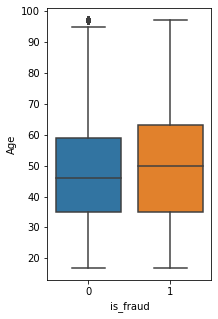

In [4]:
#Let’s visualize if there is any relationship between the target variable and Age.
# Visualize relationship between is_fraud and age. We can see that majority of fraud happened between age 37 to 65.
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=fullset["is_fraud"],y=fullset["Age"])

In [5]:
#convert trans_date_time to month and year
fullset['trans_date_trans_time'] = pd.to_datetime(fullset['trans_date_trans_time']).dt.to_period('m')
fullset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Age
0,0,2019-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34
1,1,2019-01,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,43
2,2,2019-01,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60
3,3,2019-01,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55
4,4,2019-01,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36


In [6]:
#check if any null value in the dataset
fullset.isna().sum()
#there is no null value in the dataset

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Age                      0
dtype: int64

In [7]:
#check for unique values in the dataset.
for col in fullset:
    uValue = np.unique(fullset[col])
    rValue = len(uValue)
    if rValue < 50:
        print('Unique values {} total {} --{}'.format(col, rValue, uValue))
    else:
        print('Unique Value {} -- {}'.format(col, rValue))

Unique Value Unnamed: 0 -- 1296675
Unique values trans_date_trans_time total 24 --[Period('2019-01', 'M') Period('2019-02', 'M') Period('2019-03', 'M')
 Period('2019-04', 'M') Period('2019-05', 'M') Period('2019-06', 'M')
 Period('2019-07', 'M') Period('2019-08', 'M') Period('2019-09', 'M')
 Period('2019-10', 'M') Period('2019-11', 'M') Period('2019-12', 'M')
 Period('2020-01', 'M') Period('2020-02', 'M') Period('2020-03', 'M')
 Period('2020-04', 'M') Period('2020-05', 'M') Period('2020-06', 'M')
 Period('2020-07', 'M') Period('2020-08', 'M') Period('2020-09', 'M')
 Period('2020-10', 'M') Period('2020-11', 'M') Period('2020-12', 'M')]
Unique Value cc_num -- 999
Unique Value merchant -- 693
Unique values category total 14 --['entertainment' 'food_dining' 'gas_transport' 'grocery_net' 'grocery_pos'
 'health_fitness' 'home' 'kids_pets' 'misc_net' 'misc_pos' 'personal_care'
 'shopping_net' 'shopping_pos' 'travel']
Unique Value amt -- 60616
Unique Value first -- 355
Unique Value last -- 486

Text(0.5, 1.0, 'Fraud growths')

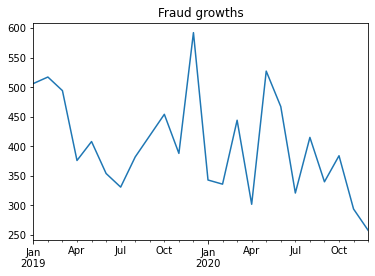

In [8]:
#plot line chart for fraud
fraud = fullset.query('is_fraud == 1')  
fraud['trans_date_trans_time'].value_counts().sort_index().plot()
plt.title('Fraud growths')

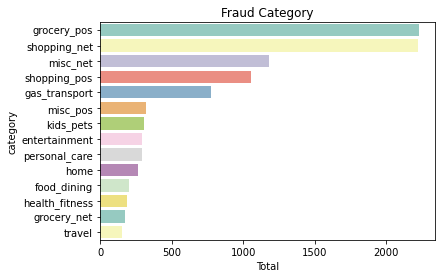

In [9]:
#plot categories which most fraud happening
sns.countplot(y=fraud.category, data=fraud, palette = 'Set3', order = fraud.category.value_counts().index)
plt.title('Fraud Category')
plt.xlabel('Total')
plt.show()

From the graph above, we can see most of fraud happening in shopping and grocery categories

In [10]:
#number of data of for is_fraud classification
print(fullset['is_fraud'].value_counts())

0    1842743
1       9651
Name: is_fraud, dtype: int64


as we can see from the total of 1852394 rows,
it only 9651 classified as fraud meaning the data is imbalanced.

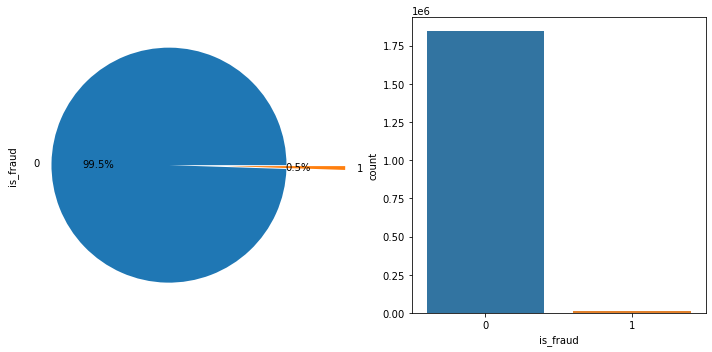

In [11]:
#visual the imbalanced data using charts
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,2,1)
explode = [0, 0.5]
#labels = ['Fraud', 'Non-Fraud']
a= fullset["is_fraud"].value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.1f%%')
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=fullset["is_fraud"])
plt.tight_layout()
plt.show()

In [12]:
#checking the percentage comparison for the imbalanced data

Fraud = len(fullset[fullset['is_fraud']==1])
NoFraud = len(fullset[fullset['is_fraud']==0])

print('No Fraud Percentage {}'.format((NoFraud/(NoFraud+Fraud))*100))
print('Fraud Percentage {}'.format((Fraud/(NoFraud+Fraud))*100))

No Fraud Percentage 99.47899852839083
Fraud Percentage 0.5210014716091717


The imbalanced ratio is 99.47:0.52 which means that our dataset is highly imbalanced where majority of transactions are legitimate transactions and very few are fraudulent transactions.

The machine learning model trained on this data may yield high overall prediction towards majority class since 99.47% samples belong to majority class or class 0.

Since our dataset is huge, we treated class imbalance problem using random under-sampling techinque from imblearn.

Histogram - is a graphical representation of the distribution of a dataset: location, spread and skewness of the data.

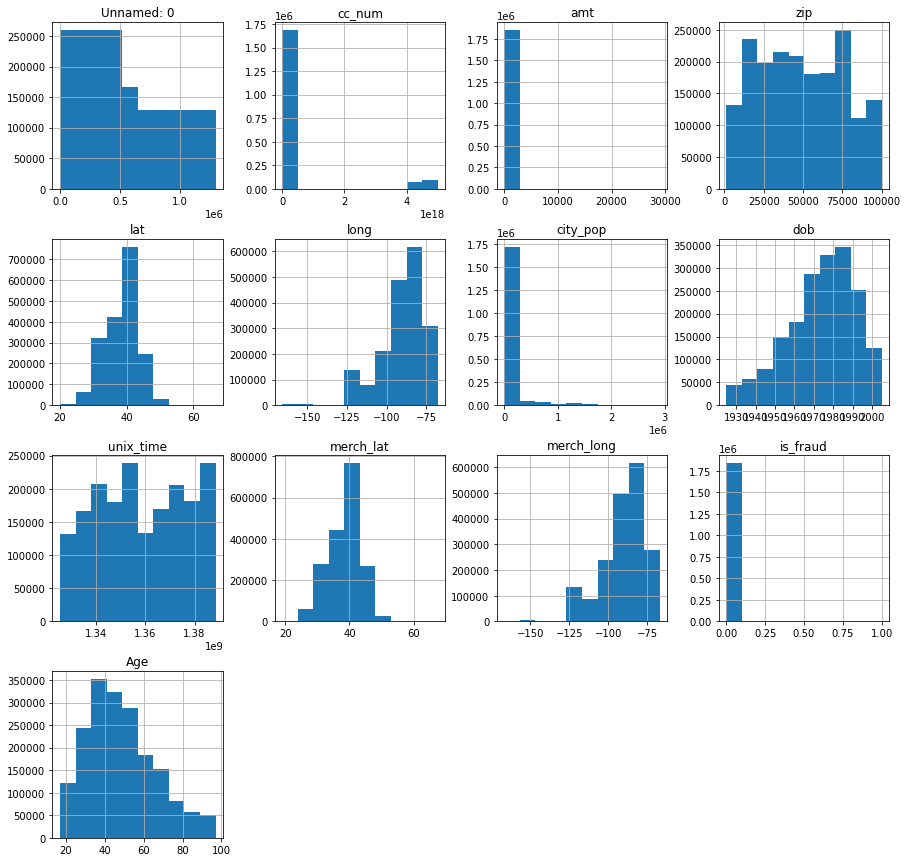

In [13]:
#plotting the data distribution
p = fullset.hist(figsize = (15,15))

We used Label Encoder to convert categorical data into numerical data for further processing

In [14]:
#apply label encoder to the dataset and put in the new dataset
newset = fullset.apply(LabelEncoder().fit_transform)

#print dataset after label encoding
print(newset.head(5))

#delete fullset since we transform the data with label encoder to newset
del fullset

   Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0           0                      0     454       514         8    397   
1           1                      0      44       241         4  10623   
2           2                      0     241       390         0  21911   
3           3                      0     519       360         2   4400   
4           4                      0     377       297         9   4096   

   first  last  gender  street  ...  long  city_pop  job  dob  trans_num  \
0    164    18       0     576  ...   704       462  372  791      80326   
1    312   161       0     439  ...    62        43  431  619     227462   
2    116   386       1     610  ...    90       491  308  309    1169030   
3    165   468       1     945  ...    93       370  330  405     777909   
4    339   153       1     422  ...   764        22  116  746    1186866   

   unix_time  merch_lat  merch_long  is_fraud  Age  
0          0     550600     1223201    

Data Correlation - We checked highly correlated values for Threshold > 95%

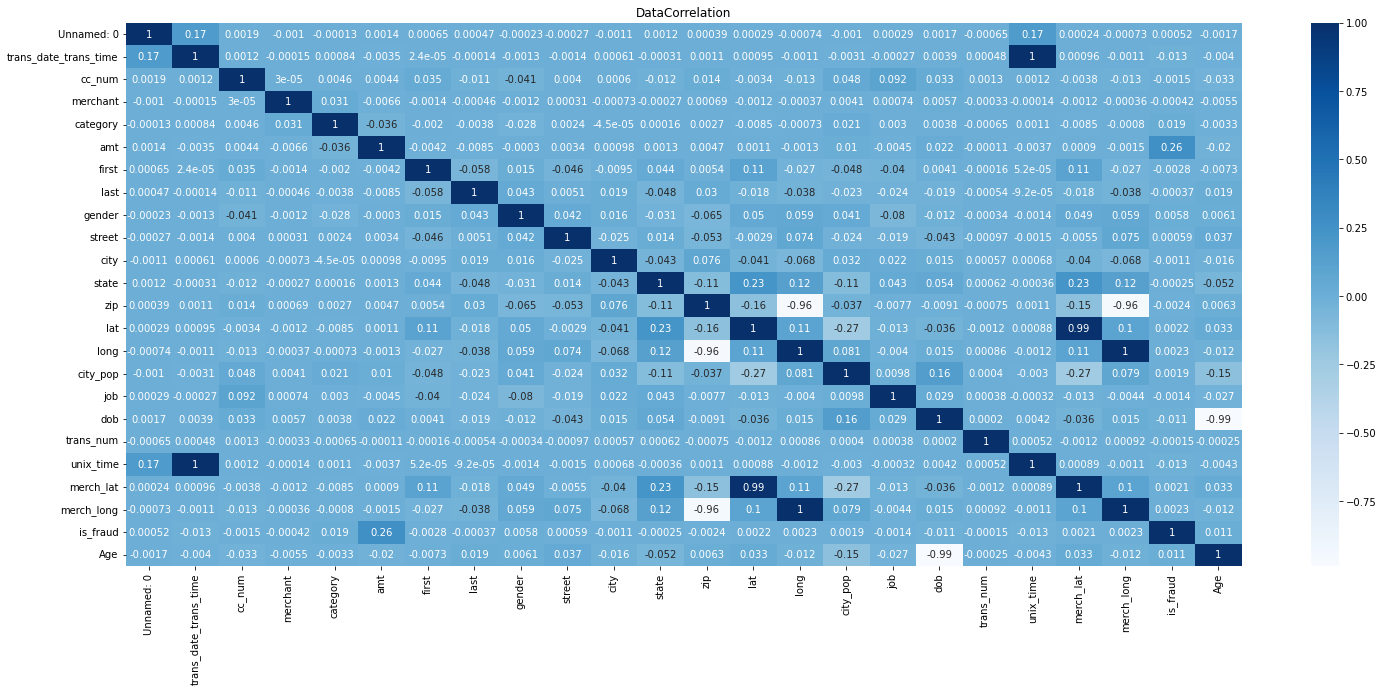

In [15]:
fig, ax = plt.subplots(figsize=(25,10))  
sns.heatmap(newset.corr(), annot = True, ax=ax, cmap = 'Blues')
plt.title("DataCorrelation")
plt.show()

In [16]:
#we will be dropping is_fraud because we will use it as our y axis
#Dropping variables which are highly correlated like merch_lat and merch_long 
dropvar = ['is_fraud','Unnamed: 0', 'first', 'last', 'dob', 'trans_date_trans_time','trans_num', 'merch_lat', 'merch_long'] 
#create our dependent variables
x = newset.drop(dropvar, axis=1).copy()
print(x.head())

   cc_num  merchant  category    amt  gender  street  city  state  zip  lat  \
0     454       514         8    397       0     576   532     27  269  295   
1      44       241         4  10623       0     439   619     47  979  978   
2     241       390         0  21911       1     610   474     13  870  747   
3     519       360         2   4400       1     945    84     26  623  944   
4     377       297         9   4096       1     422   217     45  234  405   

   long  city_pop  job  unix_time  Age  
0   704       462  372          0   16  
1    62        43  431          1   25  
2    90       491  308          2   42  
3    93       370  330          3   37  
4   764        22  116          4   18  


In [17]:
#create our independent variables
y = newset['is_fraud'].copy()
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


# Random Under Sampler

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets. 

Since our dataset is highly imbalance, we keep all the data of fraud class and decrease the samples from the non-fraud class.

In [18]:
#import library for random under sampler
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import collections
from collections import Counter

#calling the method and fit it with x and y data
unSampler = RandomUnderSampler(random_state=42, replacement=True)
xund, yund = unSampler.fit_resample(x,y)

print('original dataset shape:', Counter(y))
print('resample dataset shape', Counter(yund))

#delete x and y axis before under sampler to save memory
del x, y 

original dataset shape: Counter({0: 1842743, 1: 9651})
resample dataset shape Counter({0: 9651, 1: 9651})


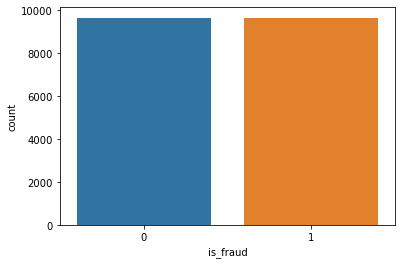

In [19]:
#visual the balanced data using bar chart
underfraud = pd.DataFrame(yund)
sns.countplot(x = 'is_fraud', data = underfraud)
plt.show()

In [20]:
print(xund)
print(yund)

       cc_num  merchant  category    amt  gender  street  city  state  zip  \
0         154       273         2   6666       0     216   137     34   85   
1         436       684        10   4679       0     642   571     34   59   
2         425       532         5   2317       1     901   300      1  354   
3         536       593        11    130       1     410   249     23  587   
4         707       265         9   5069       0     567   335     23  597   
...       ...       ...       ...    ...     ...     ...   ...    ...  ...   
19297     415       670        12  55923       1     127   750     25  391   
19298     415       349        12  52734       1     127   750     25  391   
19299     415       443        11  55899       1     127   750     25  391   
19300     415        29         4  28400       1     127   750     25  391   
19301     415       281         8  50524       1     127   750     25  391   

       lat  long  city_pop  job  unix_time  Age  
0      763   

Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting. The default scale for the MinMaxScaler is to rescale variables into the range [0,1]

#load data
import pickle
data = pickle.load(open('../dataset/ready_df.pkl', 'rb'))

xund = data.drop(['is_fraud'], axis = 1).copy()
yund = data['is_fraud'].copy()

In [21]:
#scaling the data
mmscale = MinMaxScaler()
#transform the values
X_scaled = mmscale.fit_transform(xund)

In [22]:
X_scaled.shape

(19302, 15)

Applying PCA : Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.

In [12]:
from sklearn.decomposition import PCA
pca_15 = PCA(n_components = 15, random_state=2020)
pca_15.fit(X_scaled)
X_pca_15 = pca_15.transform(X_scaled)

In [13]:
X_pca_15.shape

(19302, 15)

In [14]:
X_pca_15

array([[-0.40450626,  0.69234071, -0.38602674, ..., -0.16924771,
        -0.00775234, -0.02935986],
       [-0.37343341,  0.70791366, -0.06372352, ..., -0.26284139,
         0.01566093,  0.0218512 ],
       [ 0.53455037, -0.08972453, -0.3191266 , ..., -0.05007439,
        -0.04666409,  0.08435642],
       ...,
       [ 0.60298338, -0.08859878,  0.60680773, ...,  0.17410532,
         0.17671439,  0.13204123],
       [ 0.52820484, -0.16368913, -0.06506808, ...,  0.15666692,
         0.16601606,  0.13011013],
       [ 0.58426703, -0.11191131,  0.40593058, ...,  0.17526268,
         0.15582215,  0.13114363]])

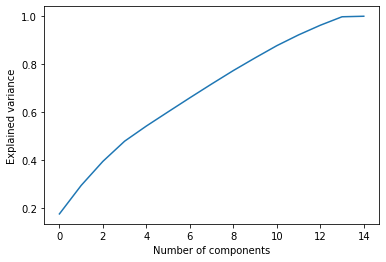

In [26]:
#create following plot

plt.plot(np.cumsum(pca_15.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi= 100)

In [27]:
np.cumsum(pca_15.explained_variance_ratio_*100)

array([ 17.74353785,  29.58598152,  39.61527508,  48.01325496,
        54.31668403,  60.21926367,  66.06691553,  71.8016402 ,
        77.39960038,  82.66731811,  87.75562073,  92.23708312,
        96.25506559,  99.77903314, 100.        ])

In [23]:
from sklearn.decomposition import PCA
pca_99 = PCA(n_components = 14, random_state=2020)
pca_99.fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)

In [24]:
np.cumsum(pca_99.explained_variance_ratio_*100)

array([17.74356812, 29.58603454, 39.61533452, 48.01335434, 54.31670947,
       60.21930064, 66.06694068, 71.80173236, 77.39969504, 82.66741645,
       87.75567305, 92.23715227, 96.25513612, 99.77903296])

In [25]:
x_pca = pd.DataFrame(data = X_pca_99)

In [26]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.404506,0.692338,-0.386039,0.095325,-0.376003,-0.223602,0.524044,0.074875,0.139516,-0.098424,-0.023513,0.184519,-0.169248,-0.007846
1,-0.373428,0.707903,-0.063732,-0.346776,-0.027259,0.113073,-0.209478,0.096619,0.482941,0.009204,0.407482,-0.206886,-0.262860,0.015492
2,0.534551,-0.089728,-0.319129,-0.455041,-0.383344,-0.338615,-0.228980,-0.357555,0.413787,0.061133,-0.182595,-0.126511,-0.050067,-0.046632
3,0.492067,-0.206869,-0.185027,0.399237,-0.207068,0.093290,-0.367202,0.381158,0.120309,0.318740,-0.089198,-0.364383,-0.177819,0.134081
4,-0.489638,-0.087894,-0.022421,0.239814,0.145243,-0.329486,0.112791,-0.150089,0.088345,0.083020,0.025349,-0.199000,-0.486192,0.360916


In [30]:
full_pca = pd.concat([x_pca, yund], axis =1)
full_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,is_fraud
0,-0.404506,0.692338,-0.386039,0.095325,-0.376003,-0.223602,0.524044,0.074875,0.139516,-0.098424,-0.023513,0.184519,-0.169248,-0.007846,0
1,-0.373428,0.707903,-0.063732,-0.346776,-0.027259,0.113073,-0.209478,0.096619,0.482941,0.009204,0.407482,-0.206886,-0.262860,0.015492,0
2,0.534551,-0.089728,-0.319129,-0.455041,-0.383344,-0.338615,-0.228980,-0.357555,0.413787,0.061133,-0.182595,-0.126511,-0.050067,-0.046632,0
3,0.492067,-0.206869,-0.185027,0.399237,-0.207068,0.093290,-0.367202,0.381158,0.120309,0.318740,-0.089198,-0.364383,-0.177819,0.134081,0
4,-0.489638,-0.087894,-0.022421,0.239814,0.145243,-0.329486,0.112791,-0.150089,0.088345,0.083020,0.025349,-0.199000,-0.486192,0.360916,0


#dump pca
import pickle
pickle.dump(full_pca, open('../dataset/pca_df.pkl', 'wb'))

#for 3rd party and public use
full_pca.to_csv('../dataset/pca_df.csv', index = False)

# Data Split to Train and Test

In [19]:
#split the data before scaling
xtrain, xtest, ytrain, ytest = train_test_split(x_pca, yund, test_size=0.3, random_state=42)

# Function for metrix calculation

In [39]:
#list for metrics scoring
score= []

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import log_loss, confusion_matrix, roc_auc_score, roc_curve

#plot the confusion matrix
def cm(algo): #it need the model variable after fitting the data
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest, algo.predict(xtest)),
                           display_labels=algo.classes_)
    disp.plot()
    plt.show()

In [41]:
#function to print metrics score
def prints(cmatrix, acctest, acctrain, overfit, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain):
    print("Confusion Matrix Accuracy Score = {:.2f}%\n".format(cmatrix))
    print("Accuracy Score: Training -> {:.2f}% Testing -> {:.2f}%\n".format(acctrain, acctest))
    print("Overfitting : {:.2f}%".format(overfit))
    print("Log Loss Training-> {} Testing -> {}\n".format(logtrain, logtest))
    print('Precision class 1: {:.2f}%\nPrecision class 0: {:.2f}%'.format(precision1, precision0))
    print('Recall class 1: {:.2f}%\nRecall class 0: {:.2f}%'.format(recall1, recall0))
    print('F1: {:.2f}%'.format(f1)) 
    print('ROC AUC Training-> {:.2f}% Testing-> {:.2f}%'.format(roctrain, roctest))
    #auc_curve(roctest, roctrain,  fpr_test, tpr_test, fpr_train, tpr_train)

In [42]:
#function add metrics score to list
def insertlist(name, cmatrix, acctest, acctrain,overfit, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain):
    score.append([name, cmatrix, acctest, acctrain,overfit, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain])

In [43]:
# Roc Curve Characterics
def auc_plot(algo):
    #create AUC curve
    test_prob = algo.predict_proba(xtest)[::,1]
    train_prob = algo.predict_proba(xtrain)[::,1]
    roctest = roc_auc_score(ytest, test_prob)
    roctrain = roc_auc_score(ytrain, train_prob)
    
    fpr_test, tpr_test, _ = roc_curve(ytest,  test_prob)
    fpr_train, tpr_train, _ = roc_curve(ytrain,  train_prob)
    plt.title("Area Under Curve")
    plt.plot(fpr_test,tpr_test,label="AUC Test="+str(roctest))
    plt.plot(fpr_train,tpr_train,label="AUC Train="+str(roctrain))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

In [44]:
#metrix function 
def scr(algo, name): #algo = model, name = string of the model name
    predtest = algo.predict(xtest)
    predtrain = algo.predict(xtrain)
    
    #confussion matrix percentage
    tn, fp, fn, tp = confusion_matrix(ytest, predtest).ravel()
    tst = ytest.count()
    cmatrix = ((tn + tp)/tst)*100    

    #accuracy score
    acctest = (accuracy_score(ytest, predtest))*100
    acctrain = (accuracy_score(ytrain, predtrain))*100
    overfit = acctrain - acctest

    #log loss
    logtest = log_loss(ytest,predtest)
    logtrain = log_loss(ytrain,predtrain)
            
    #classification report
    precision1 = (tp / (tp+fp))*100
    precision0 = (tn/(tn+fn))*100
    recall1 = (tp/(tp+fn))*100
    recall0 = (tn/(tn+fp))*100
    f1 = 2*(precision1 * recall1)/(precision1 + recall1)

    #roc auc score
    test_prob = algo.predict_proba(xtest)[::,1]
    train_prob = algo.predict_proba(xtrain)[::,1]
    roctest = (roc_auc_score(ytest, test_prob))*100
    roctrain = (roc_auc_score(ytrain, train_prob))*100

    insertlist(name, cmatrix, acctest, acctrain, overfit, logtest, logtrain, precision1,
               precision0, recall1, recall0, f1, roctest, roctrain)      
    #print metrics score
    return prints(cmatrix, acctest, acctrain, overfit, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain)

# Algo Implementation - SVM

In [39]:
#import library
from sklearn.svm import SVC

#build SVM classification
SVM1 = SVC(random_state = 42, probability=True)
SVM1.fit(xtrain, ytrain)

SVC(probability=True, random_state=42)

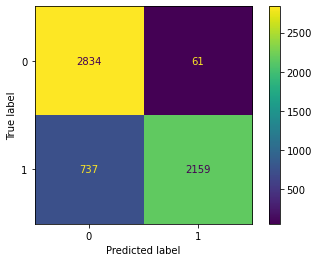

In [40]:
#calling cm function to plot the confusion matrix
cm(SVM1)

In [41]:
#calling function scr to print the metrix score
scr(SVM1, 'SVM1')

Confusion Matrix Accuracy Score = 86.22%

Accuracy Score: Training -> 86.94% Testing -> 86.22%

Overfitting : 0.72%
Log Loss Training-> 4.511955968344787 Testing -> 4.759453002690722

Precision class 1: 97.25%
Precision class 0: 79.36%
Recall class 1: 74.55%
Recall class 0: 97.89%
F1: 84.40%
ROC AUC Training-> 91.93% Testing-> 88.39%


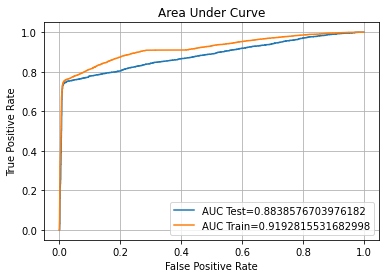

In [42]:
#calling function to plot the ROC_AUC learning curve
auc_plot(SVM1)

From the confusion matrix, the accuracy score is 86.22%.
Next, we will try to improve the prediction using cross validation to optimise the hyperparameters.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

# SVM tuning using StratifiedKFold and GridSearchCV
StratifiedKFold -> cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

GridSearchCV -> Exhaustive search over specified parameter values for an estimator

References: sklearn documentary

https://scikit-learn.org/stable/modules/grid_search.html

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

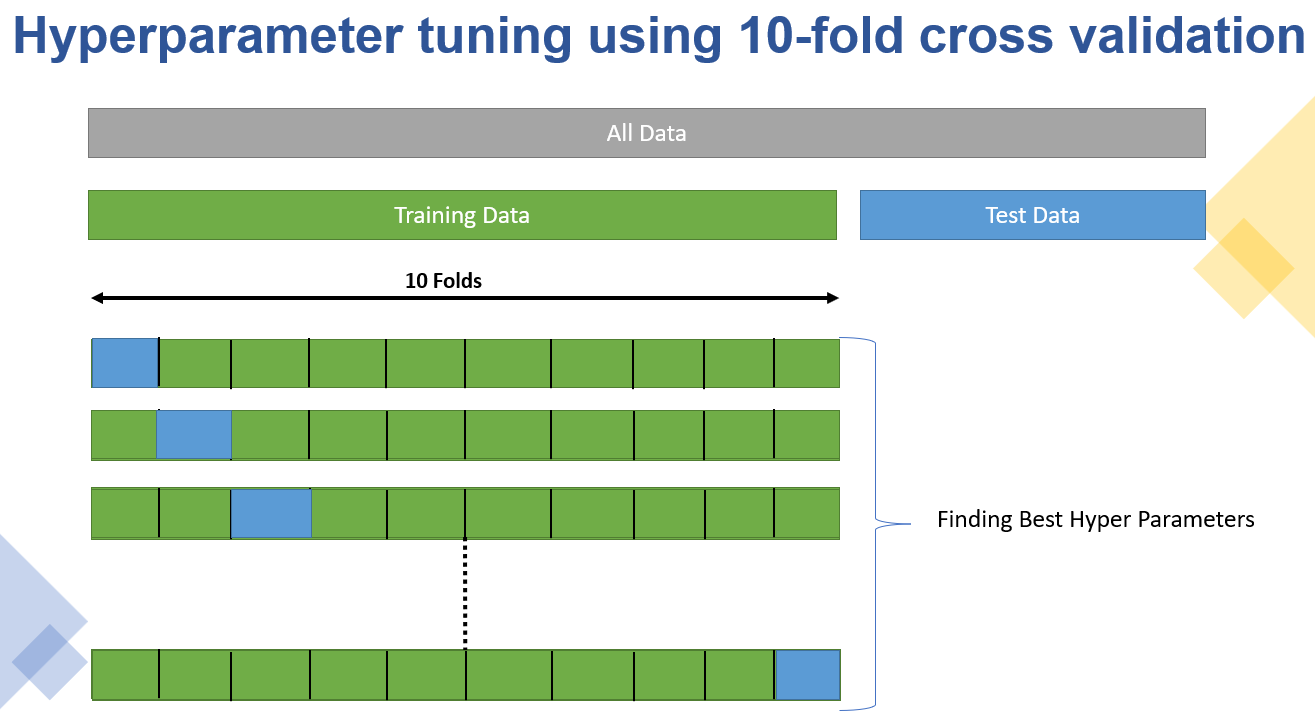

In [43]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = [
    {
        'C': [1, 10, 15, 20, 25, 30], 
        'gamma': ['scale', 0.001, 0.01],
        'kernel': ['rbf','linear','sigmoid']
    },
]

#tuning the model using gridsearchCV and stratifiedkfold
optimal_param = GridSearchCV(
    SVC(), param_grid, cv=kfold, scoring='accuracy', verbose = 2)

In [44]:
#fitting the tuned model with training dataset
optimal_param.fit(xtrain, ytrain)

#print the best parameter
print(optimal_param.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.2s
[CV] END ....................C=1, gamma=scale,

In [45]:
#build the model with hyperparameter tuning
optimal_param = SVC(random_state = 42, probability=True, C=20, gamma='scale', kernel='rbf')
optimal_param.fit(xtrain,ytrain)

SVC(C=20, probability=True, random_state=42)

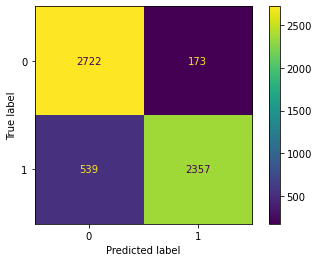

In [46]:
#plot confusion matrix for the tuned model
cm(optimal_param)

In [47]:
#print metrics score
scr(optimal_param, 'SVM_tuned')

Confusion Matrix Accuracy Score = 87.71%

Accuracy Score: Training -> 93.07% Testing -> 87.71%

Overfitting : 5.37%
Log Loss Training-> 2.392745485940981 Testing -> 4.246545868335664

Precision class 1: 93.16%
Precision class 0: 83.47%
Recall class 1: 81.39%
Recall class 0: 94.02%
F1: 86.88%
ROC AUC Training-> 97.61% Testing-> 93.11%


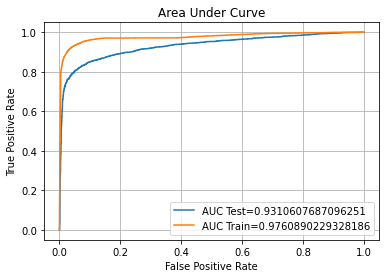

In [48]:
#plot the learning curve
auc_plot(optimal_param)

Before Tuning Accuracy Score - 86.22%

After Tuning Accuracy score is 87.71%

However, model is slightly overfit after hypertuning.

# Logistic Regression

In [49]:
#create logistic regression model
logreg = LogisticRegression()
#fitting the model with training dataset
logreg.fit(xtrain, ytrain)

LogisticRegression()

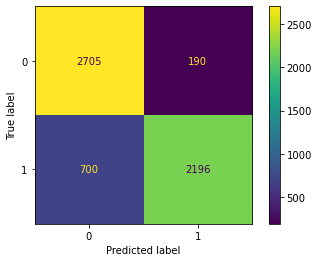

In [50]:
#confusion matrix
cm(logreg)

In [51]:
#print metrics score
scr(logreg, 'Logreg')

Confusion Matrix Accuracy Score = 84.63%

Accuracy Score: Training -> 85.06% Testing -> 84.63%

Overfitting : 0.43%
Log Loss Training-> 5.15872999693614 Testing -> 5.308178710927689

Precision class 1: 92.04%
Precision class 0: 79.44%
Recall class 1: 75.83%
Recall class 0: 93.44%
F1: 83.15%
ROC AUC Training-> 85.19% Testing-> 84.35%


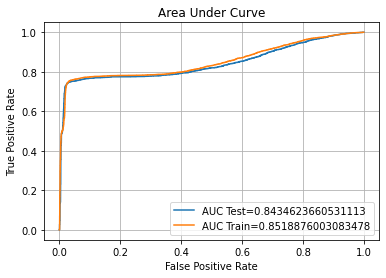

In [52]:
#plot learning curve
auc_plot(logreg)

The accuracy score is 84.63%, it's lower compared to SVM.
We will tune the model using grid search cross validation

# Logistic Regression Tuning using GridSearchCV

In [53]:
log_param = [
    {
        'C': [0.01, 0.1, 1.0, 10, 100], 
        'penalty': ['l2'],
        'solver': ['newton-cg', 'sag','saga'] 
    },
]

#tuned the model using gridsearch and kfold
opt_log = GridSearchCV(LogisticRegression(), param_grid = log_param, scoring='accuracy', cv=kfold, verbose = 2)

#fit the tuned model with training dataset
opt_log.fit(xtrain, ytrain) 
print(opt_log.best_params_) #best parameter tuning result

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=

In [149]:
#build the model with hyperparameter tuning
opt_log = LogisticRegression(random_state = 42, C=0.012, penalty = 'l2', solver = 'sag' )
opt_log.fit(xtrain, ytrain)

LogisticRegression(C=0.012, random_state=42, solver='sag')

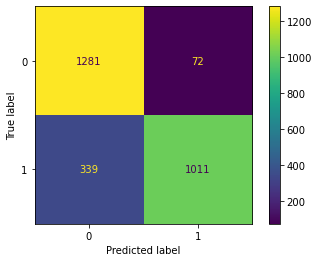

In [150]:
#plot confusion matrix
cm(opt_log)

In [152]:
#print metrics score
scr(opt_log, 'logreg_tuned')

Confusion Matrix Accuracy Score = 84.79%

Accuracy Score: Training -> 85.54% Testing -> 84.79%

Overfitting : 0.74%
Log Loss Training-> 4.9951177071719135 Testing -> 5.251755334562807

Precision class 1: 93.35%
Precision class 0: 79.07%
Recall class 1: 74.89%
Recall class 0: 94.68%
F1: 83.11%
ROC AUC Training-> 84.62% Testing-> 84.06%


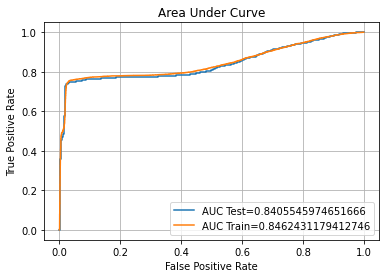

In [153]:
#plot learning curve
auc_plot(opt_log)

Before Tuning Accuracy = 84.63%

After Tuning Accuracy = 85.17%

overfitting is reduced as well

# Random Forest

In [58]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
#fit the model with training dataset
RF.fit(xtrain, ytrain)

RandomForestClassifier()

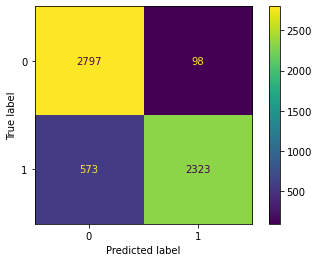

In [59]:
#calling function to plot confusion matrix
cm(RF)

In [60]:
#calling function to calculate model score
scr(RF, 'RF')

Confusion Matrix Accuracy Score = 88.41%

Accuracy Score: Training -> 99.99% Testing -> 88.41%

Overfitting : 11.58%
Log Loss Training-> 0.0025563449333819988 Testing -> 4.0020026457491324

Precision class 1: 95.95%
Precision class 0: 83.00%
Recall class 1: 80.21%
Recall class 0: 96.61%
F1: 87.38%
ROC AUC Training-> 100.00% Testing-> 93.89%


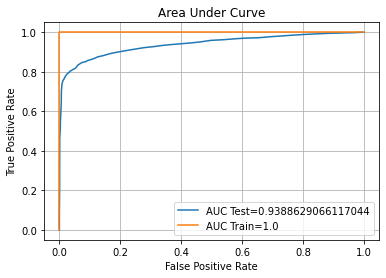

In [61]:
auc_plot(RF)

The accuracy score is 88.50%, it's higher compared to SVM and Logistic Regression. However, the model is overfitting as the training accuracy score is 100%

# Random Forest Tuning using RandomizedSearchCV and Kfold
Randomized search on hyper parameters.
In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

References: sklearn documentary

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#implement parameter tuning using randomized search cv and kfold
opt_RF = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = kfold, verbose=2, random_state=42, n_jobs = -1)
#fit the model with training dataset
opt_RF.fit(xtrain, ytrain) 
print(opt_RF.best_params_) #best parameter tuning result

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 191, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [63]:
#build the model with hyperparameter tuning
opt_RF = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1,
                                max_features= 'auto', max_depth= 50, bootstrap= False)
opt_RF.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

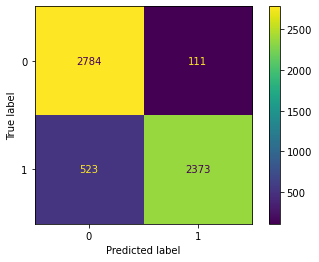

In [64]:
#calling function to plot confusion matrix
cm(opt_RF)

In [65]:
#calling function to show the metrics score
scr(opt_RF, 'RF_tuned')

Confusion Matrix Accuracy Score = 89.05%

Accuracy Score: Training -> 100.00% Testing -> 89.05%

Overfitting : 10.95%
Log Loss Training-> 9.992007221626413e-16 Testing -> 3.781328438903148

Precision class 1: 95.53%
Precision class 0: 84.19%
Recall class 1: 81.94%
Recall class 0: 96.17%
F1: 88.22%
ROC AUC Training-> 100.00% Testing-> 94.53%


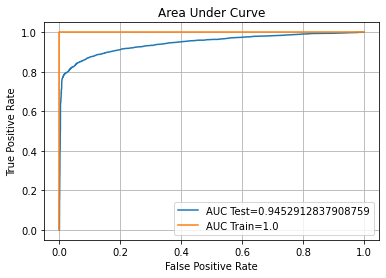

In [66]:
#plot learning curve
auc_plot(opt_RF)

The accuracy score after hyperparameter tuning is increased around 1%, however the overfitting still be a problem as the training accuracy still 100%

In [67]:
from sklearn.model_selection import validation_curve

#Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(100, 1200, 100)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

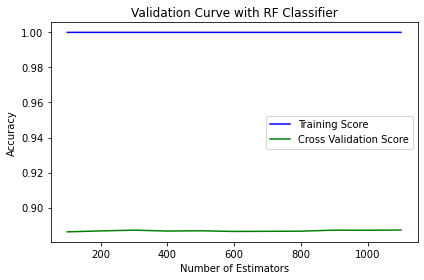

In [68]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

600 

In [69]:
from sklearn.model_selection import validation_curve

#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(0, 20, 5)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'min_samples_split', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

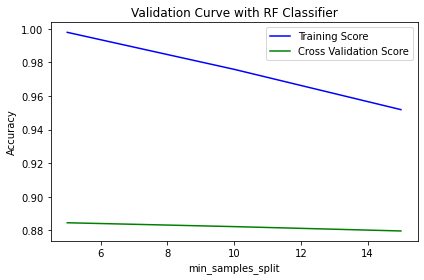

In [70]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

min_samples_split=5

In [71]:
from sklearn.model_selection import validation_curve

#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(1, 20, 5)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'min_samples_leaf', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

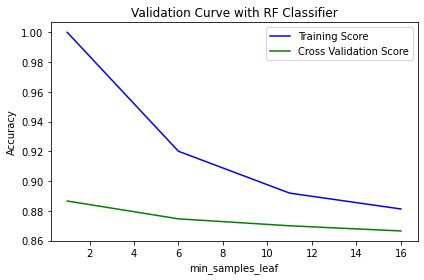

In [72]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

min_samples_leaf =1

In [73]:
from sklearn.model_selection import validation_curve

#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(1, 20, 5)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'max_depth', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

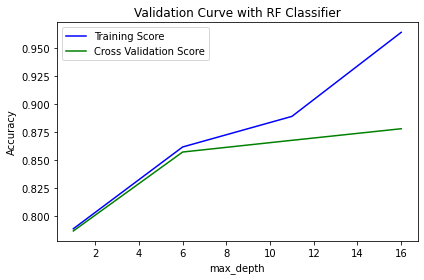

In [74]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [33]:
#build the model with hyperparameter tuning
opt_RF = RandomForestClassifier(n_estimators= 600, min_samples_split= 5, min_samples_leaf= 2,max_features= 'auto',max_depth= 6)
opt_RF.fit(xtrain, ytrain)

NameError: name 'RandomForestClassifier' is not defined

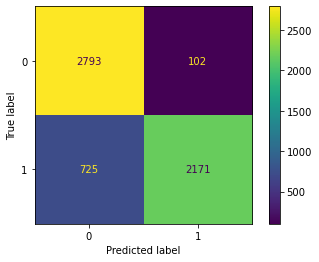

In [76]:
#calling function to plot confusion matrix
cm(opt_RF)

In [77]:
#calling function to show the metrics score
scr(opt_RF, 'RF_tuned')

Confusion Matrix Accuracy Score = 85.72%

Accuracy Score: Training -> 86.23% Testing -> 85.72%

Overfitting : 0.51%
Log Loss Training-> 4.757370644983812 Testing -> 4.932420935508378

Precision class 1: 95.51%
Precision class 0: 79.39%
Recall class 1: 74.97%
Recall class 0: 96.48%
F1: 84.00%
ROC AUC Training-> 90.53% Testing-> 88.00%


# Decision Tree

In [78]:
#import the library
from sklearn.tree import DecisionTreeClassifier
#create the model
decTree = DecisionTreeClassifier()
#fit the model with training data
decTree.fit(xtrain, ytrain)

DecisionTreeClassifier()

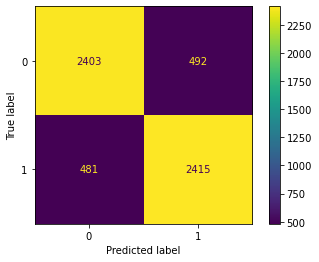

In [79]:
#confusion matrix
cm(decTree)

In [80]:
#calling metrics score function
scr(decTree, 'decTree')

Confusion Matrix Accuracy Score = 83.20%

Accuracy Score: Training -> 100.00% Testing -> 83.20%

Overfitting : 16.80%
Log Loss Training-> 9.992007221626413e-16 Testing -> 5.803250359900493

Precision class 1: 83.08%
Precision class 0: 83.32%
Recall class 1: 83.39%
Recall class 0: 83.01%
F1: 83.23%
ROC AUC Training-> 100.00% Testing-> 83.20%


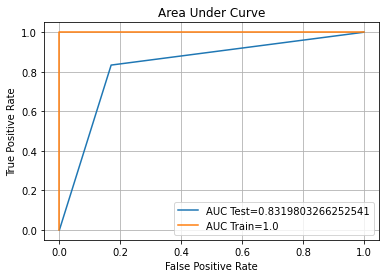

In [81]:
#plot learning curve
auc_plot(decTree)

The accuracy score is 95.04%, it's higher compared to SVM and Logistic Regression. However, it's still lower than Random Forest

# Tuning Decision Tree using RandomizedSearchCV

In [82]:
#parameter variables
criterion = ['gini', 'entropy']
max_depth = [3,6,9]
min_samples_split = [3,6,9]
min_samples_leaf = [2,4,8]

#put the variables to dict
random_tree = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#implement hyperparameter tuning to the model
opt_decTree = RandomizedSearchCV(estimator = decTree, param_distributions = random_tree, cv = kfold, verbose=2, n_jobs = -1)
#fit the model with training dataset
opt_decTree.fit(xtrain, ytrain) 
print(opt_decTree.best_params_) #best parameter

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'min_samples_split': 3, 'min_samples_leaf': 8, 'max_depth': 9, 'criterion': 'gini'}


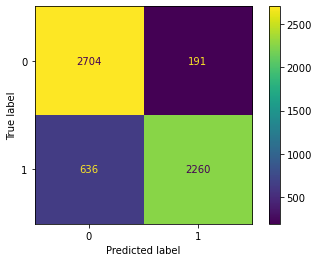

In [83]:
#function to plot confusion matrix
cm(opt_decTree)

In [84]:
#function to print metrics score
scr(opt_decTree, 'decTree_tuned')

Confusion Matrix Accuracy Score = 85.72%

Accuracy Score: Training -> 89.07% Testing -> 85.72%

Overfitting : 3.35%
Log Loss Training-> 3.7757383924319536 Testing -> 4.932433224261839

Precision class 1: 92.21%
Precision class 0: 80.96%
Recall class 1: 78.04%
Recall class 0: 93.40%
F1: 84.53%
ROC AUC Training-> 94.47% Testing-> 89.92%


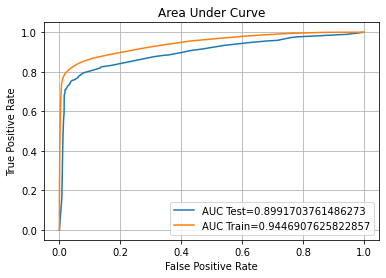

In [85]:
#plot learning curve
auc_plot(opt_decTree)

The accuracy score after hyperparameter tuning is increased around 1%, and the overfitting is reduced. So far, decision tree is the best model for this case.

In [86]:
#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(1, 10, 1)
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'min_samples_split', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

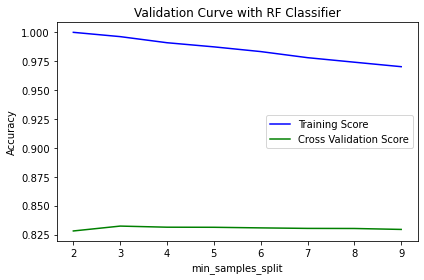

In [87]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

min_samples_split = 7

In [88]:
#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(1, 50, 5)
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'min_samples_leaf', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

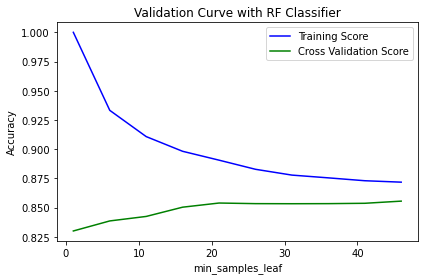

In [89]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

min_samples_leaf = 40

In [90]:
#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(1, 20, 1)
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'max_depth', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

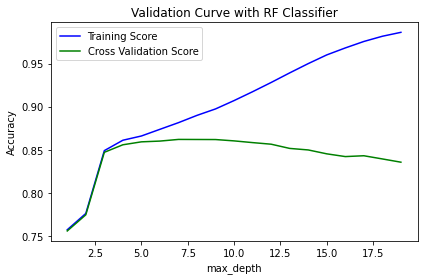

In [91]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

max_depth = 5

In [92]:
#implement hyperparameter tuning to the model
opt_decTree = DecisionTreeClassifier(min_samples_split = 7, min_samples_leaf = 40, max_depth = 5)
#fit the model with training dataset
opt_decTree.fit(xtrain, ytrain) 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=40, min_samples_split=7)

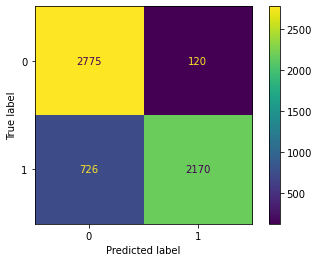

In [93]:
#function to plot confusion matrix
cm(opt_decTree)

In [94]:
#function to print metrics score
scr(opt_decTree, 'decTree_tuned')

Confusion Matrix Accuracy Score = 85.39%

Accuracy Score: Training -> 86.13% Testing -> 85.39%

Overfitting : 0.74%
Log Loss Training-> 4.790605673910119 Testing -> 5.045743529923341

Precision class 1: 94.76%
Precision class 0: 79.26%
Recall class 1: 74.93%
Recall class 0: 95.85%
F1: 83.69%
ROC AUC Training-> 90.06% Testing-> 88.83%


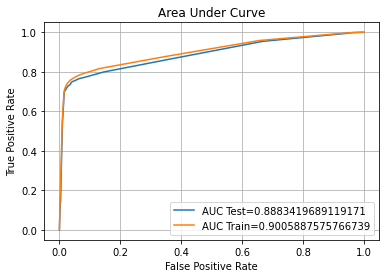

In [95]:
#plot learning curve
auc_plot(opt_decTree)

# KNN

In [96]:
#import library for KNN
from sklearn.neighbors import KNeighborsClassifier

#build the model
neigh = KNeighborsClassifier(n_neighbors=3)
#fit the model with training dataset
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

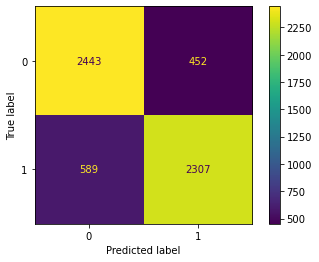

In [97]:
#funtion for confusion matrix plot
cm(neigh)

In [98]:
#function for metrics calculation
scr(neigh, 'KNN')

Confusion Matrix Accuracy Score = 82.02%

Accuracy Score: Training -> 91.15% Testing -> 82.02%

Overfitting : 9.12%
Log Loss Training-> 3.0574194329192323 Testing -> 6.208811542935672

Precision class 1: 83.62%
Precision class 0: 80.57%
Recall class 1: 79.66%
Recall class 0: 84.39%
F1: 81.59%
ROC AUC Training-> 97.18% Testing-> 88.02%


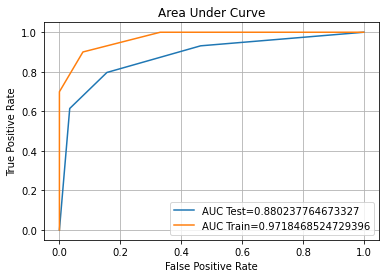

In [99]:
#plot learning curve
auc_plot(neigh)

The accuracy score is 83.15%, it's the lowest accuracy compared to the other algorithms. Also, this model has overfitting problem.

# Tuning KNN using GridSearchCV and KFold

Text(0, 0.5, 'testing')

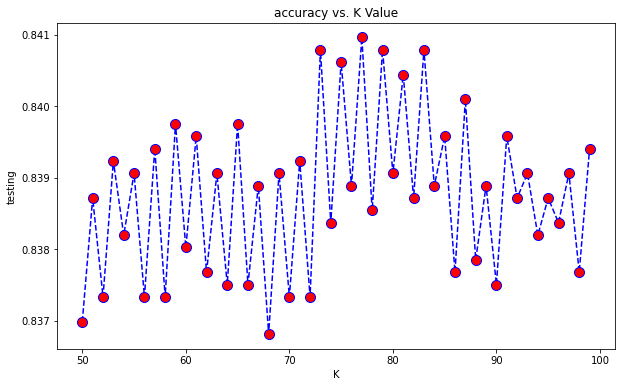

In [100]:
#finding the optimum k number
acc=[]
for i in range(50,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(xtrain,ytrain)
    yhat = neigh.predict(xtest)
    acc.append(accuracy_score(ytest, yhat))

#plot to visualise the best k    
plt.figure(figsize=(10,6))
plt.plot(range(50,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('testing')

In [101]:
#parameter dict
tuning_params = {
    'n_neighbors' : [71,75,77,83], #from the plot above
    "leaf_size":[5,10,20,30],
    "p":[1,2]
}

#implement hyperparameter tuning to the model
opt_knn = GridSearchCV(neigh, param_grid = tuning_params, cv = kfold, verbose = 1, n_jobs = -1)
#fit the model with training dataset
opt_knn.fit(xtrain, ytrain) 
print(opt_knn.best_params_) #best parameter

Fitting 10 folds for each of 32 candidates, totalling 320 fits
{'leaf_size': 5, 'n_neighbors': 71, 'p': 1}


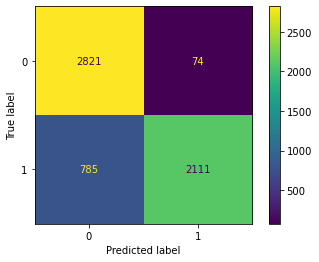

In [102]:
#function for confusion matrix plot
cm(opt_knn)

In [103]:
#function for metrics calculation
scr(opt_knn, 'knn_tuned')

Confusion Matrix Accuracy Score = 85.17%

Accuracy Score: Training -> 85.66% Testing -> 85.17%

Overfitting : 0.50%
Log Loss Training-> 4.951650492672066 Testing -> 5.1232719898874315

Precision class 1: 96.61%
Precision class 0: 78.23%
Recall class 1: 72.89%
Recall class 0: 97.44%
F1: 83.09%
ROC AUC Training-> 90.56% Testing-> 89.42%


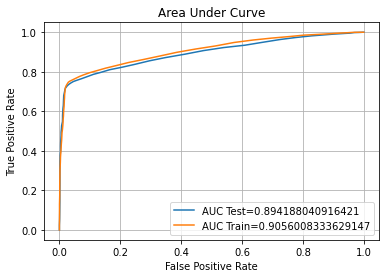

In [104]:
#plot learning curve
auc_plot(opt_knn)

The accuracy score after hyperparameter tuning is increased around 2% and the overfitting is reduced respectively.

In [105]:
#Setting the range for the parameter (from 1 to 100)
parameter_range = np.arange(1, 100, 10)
train_scoreNum, test_scoreNum = validation_curve(
                                KNeighborsClassifier(),
                                X = xtrain, y = ytrain, 
                                param_name = 'n_neighbors', 
                                param_range = parameter_range, cv = 10, scoring = "accuracy")

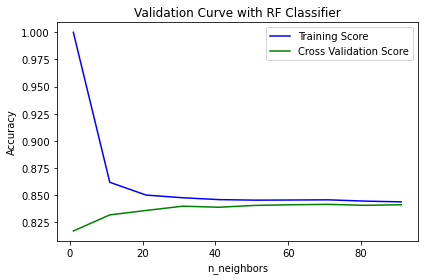

In [106]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scoreNum, axis = 1)
std_train_score = np.std(train_scoreNum, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scoreNum, axis = 1)
std_test_score = np.std(test_scoreNum, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

n_neighbors = 80

In [107]:
#implement hyperparameter tuning to the model
opt_knn = KNeighborsClassifier(n_neighbors=90, p= 1, leaf_size= 5)
#fit the model with training dataset
opt_knn.fit(xtrain, ytrain) 


KNeighborsClassifier(leaf_size=5, n_neighbors=90, p=1)

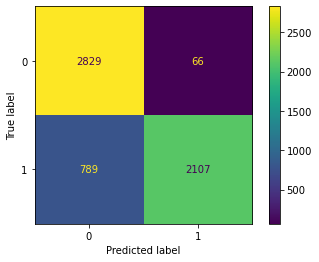

In [108]:
#function for confusion matrix plot
cm(opt_knn)

In [109]:
#function for metrics calculation
scr(opt_knn, 'knn_tuned')

Confusion Matrix Accuracy Score = 85.24%

Accuracy Score: Training -> 85.68% Testing -> 85.24%

Overfitting : 0.44%
Log Loss Training-> 4.946537033449476 Testing -> 5.099414020217411

Precision class 1: 96.96%
Precision class 0: 78.19%
Recall class 1: 72.76%
Recall class 0: 97.72%
F1: 83.13%
ROC AUC Training-> 90.07% Testing-> 88.92%


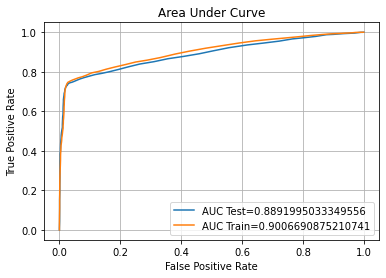

In [110]:
#plot learning curve
auc_plot(opt_knn)

# Function to calculate metrics score for DL

In [21]:
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [46]:
#pass algo, name, testeval score, traineval score, confusion matrix
def calc(algo, name, testeval, traineval, cmt): 
    #tn, fp, fn, tp =tf.experimental.numpy.ravel(cmt)
    #tn, fp, fn, tp = np.ravel(cmt)
    #tn = tn.numpy()
    #fp = fp.numpy()
    #fn = fn.numpy()
    #tp = tp.numpy()
    tn = int(cmt[0,0])
    fp = int(cmt[0,1])
    fn = int(cmt[1,0])
    tp = int(cmt[1,1])
    cmatrix = ((tn + tp)/(tn+fp+fn+tp))*100  
    acctest = (testeval[1])*100
    acctrain = (traineval[1])*100
    overfit = acctrain - acctest

    #log loss
    logtest = testeval[0]
    logtrain = traineval[0]
            
     #classification report
    precision1 = (tp / (tp+fp))*100
    precision0 = (tn/(tn+fn))*100
    recall1 = (tp/(tp+fn))*100
    recall0 = (tn/(tn+fp))*100
    f1 = 2*(precision1 * recall1)/(precision1 + recall1)

    #roc auc score
    roctest = (testeval[2])*100
    roctrain = (traineval[2])*100
    #insert the metrics score to list
    insertlist(name, cmatrix, acctest, acctrain, overfit, logtest, logtrain, precision1,
               precision0, recall1, recall0, f1, roctest, roctrain)      
    #print metrics score
    return prints(cmatrix, acctest, acctrain, overfit, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain)

In [26]:
#import library for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization, Conv1D,MaxPool1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [27]:
# Let's say we want to split the data in 60:20:20 for train:valid:test dataset
# In the first step we will split the data in training and remaining dataset
Xtrain, xrem, Ytrain, yrem = train_test_split(xtrain,ytrain, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
xvalid, xtest, yvalid, ytest = train_test_split(xrem,yrem, test_size=0.5)

In [28]:
Xtrain.shape

(8106, 14)

In [29]:
#build the model
ann=keras.Sequential([keras.layers.Dense(20,input_shape=(14,),activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid'),])
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC()])
#train the model
history=ann.fit(Xtrain,Ytrain,epochs=30,validation_data=(xvalid,yvalid),verbose=1)

Epoch 1/30
254/254 [==============================] - 1s 2ms/step - loss: 0.6213 - accuracy: 0.6954 - auc: 0.7766 - val_loss: 0.5347 - val_accuracy: 0.8161 - val_auc: 0.8373
Epoch 2/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8485 - auc: 0.8525 - val_loss: 0.4302 - val_accuracy: 0.8483 - val_auc: 0.8421
Epoch 3/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8570 - auc: 0.8563 - val_loss: 0.4101 - val_accuracy: 0.8479 - val_auc: 0.8468
Epoch 4/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8575 - auc: 0.8605 - val_loss: 0.4044 - val_accuracy: 0.8475 - val_auc: 0.8496
Epoch 5/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8583 - auc: 0.8640 - val_loss: 0.4001 - val_accuracy: 0.8483 - val_auc: 0.8524
Epoch 6/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8599 - auc: 0.8662 - val_loss: 0.39

In [30]:
def plot_learningCurve(history,epoch):
  #plotting training and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  #plotting training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()


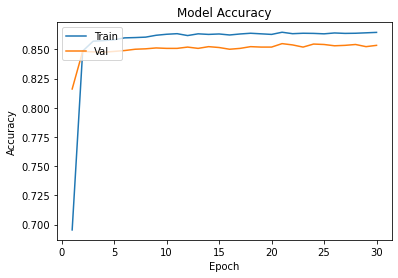

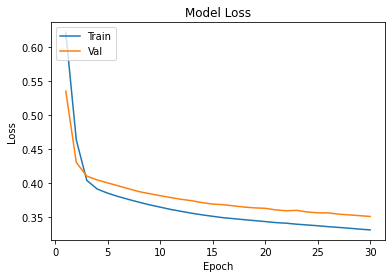

In [31]:
plot_learningCurve(history,30)

In [32]:
#evaluate testing
testeval1 = ann.evaluate(xtest, ytest)

85/85 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8576 - auc: 0.9042


In [33]:
#evaluate training
traineval1 = ann.evaluate(xvalid, yvalid)

85/85 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8534 - auc: 0.9030


In [34]:
ytest[:10]

4109     0
13942    1
6487     0
6856     0
5774     0
4890     0
8319     0
15371    1
19142    1
12461    1
Name: is_fraud, dtype: int64

In [35]:
#make prediction
yprediction=ann.predict(xtest)
yprediction[:5]

array([[0.14540672],
       [0.99999166],
       [0.22771537],
       [0.22295809],
       [0.30351627]], dtype=float32)

In [36]:
ypred=[]
for element in yprediction:
    if element>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

ypred[:10]


[0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

As we use the sigmoid function for output layer the prediction will be between 0 and 1.Let's change it to 0 for less than 0.5 and 1 for greater than 0.5

Text(42.0, 0.5, 'actual')

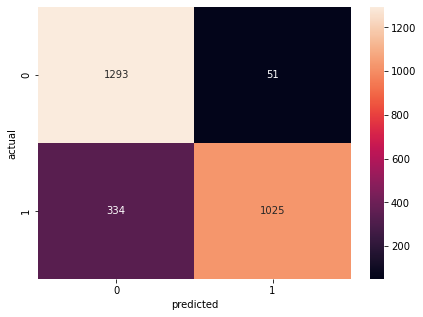

In [37]:
#plot confusion matrix
cmt =tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(7,5))
sns.heatmap(cmt,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [47]:
#print the metrics score
#pass algo, name, testeval score, traineval score, confusion matrix
calc(ann, 'ann', testeval1, traineval1, cmt) 

Confusion Matrix Accuracy Score = 85.76%

Accuracy Score: Training -> 85.34% Testing -> 85.76%

Overfitting : -0.41%
Log Loss Training-> 0.3508951961994171 Testing -> 0.35023459792137146

Precision class 1: 95.26%
Precision class 0: 79.47%
Recall class 1: 75.42%
Recall class 0: 96.21%
F1: 84.19%
ROC AUC Training-> 90.30% Testing-> 90.42%


# Hyperparameter tuning ANN

In [156]:
def create_my_model(optimizer):
    mymodel=Sequential()
    mymodel.add(Dense(20,input_dim=14,activation='relu'))
    mymodel.add(Dense(1,activation='sigmoid'))
    mymodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy',
                                                                            tf.keras.metrics.AUC()])
    return mymodel

In [157]:
model=KerasClassifier(build_fn= create_my_model,epochs=50,batch_size=15)

In [158]:
optimizer = ['SGD','Adadelta','RMSprop','Adagrad','Adam']
parameter_grid=dict(optimizer=optimizer)
grid= GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=kfold)
grid_result=grid.fit(xtrain,ytrain)

Epoch 1/50
901/901 [==============================] - 1s 720us/step - loss: 0.4915 - accuracy: 0.8095 - auc_4: 0.8432
Epoch 2/50
901/901 [==============================] - 1s 720us/step - loss: 0.3984 - accuracy: 0.8539 - auc_4: 0.8543
Epoch 3/50
901/901 [==============================] - 1s 719us/step - loss: 0.3848 - accuracy: 0.8568 - auc_4: 0.8607
Epoch 4/50
901/901 [==============================] - 1s 740us/step - loss: 0.3722 - accuracy: 0.8602 - auc_4: 0.8705
Epoch 5/50
901/901 [==============================] - 1s 734us/step - loss: 0.3636 - accuracy: 0.8600 - auc_4: 0.8783
Epoch 6/50
901/901 [==============================] - 1s 750us/step - loss: 0.3572 - accuracy: 0.8603 - auc_4: 0.8858
Epoch 7/50
901/901 [==============================] - 1s 749us/step - loss: 0.3518 - accuracy: 0.8606 - auc_4: 0.8921
Epoch 8/50
901/901 [==============================] - 1s 755us/step - loss: 0.3475 - accuracy: 0.8603 - auc_4: 0.8973
Epoch 9/50
901/901 [==============================] - 1s

In [159]:
print("Best:%f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best:0.879430 using {'optimizer': 'Adam'}


In [160]:
#tuning epoch and batch size
def create_my_model1():
    mymodel=Sequential()
    mymodel.add(Dense(20,input_dim=14,activation='relu'))
    mymodel.add(Dense(1,activation='sigmoid'))
    mymodel.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy',
                    tf.keras.metrics.AUC()])
    return mymodel

In [161]:
model=KerasClassifier(build_fn= create_my_model1)
#defining the parameters
batchsize=[10,15,20,40,60,80,100]
epochs=[10,15,30,50]
parameter_grid=dict(batch_size=batchsize,epochs=epochs)
mygrid= GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=kfold)
grid_result1=mygrid.fit(xtrain,ytrain)

Epoch 1/50
901/901 [==============================] - 0s 467us/step - loss: 0.4707 - accuracy: 0.8160 - auc_5: 0.8506
Epoch 2/50
901/901 [==============================] - 0s 473us/step - loss: 0.3892 - accuracy: 0.8575 - auc_5: 0.8592
Epoch 3/50
901/901 [==============================] - 1s 599us/step - loss: 0.3757 - accuracy: 0.8596 - auc_5: 0.8679
Epoch 4/50
901/901 [==============================] - 1s 755us/step - loss: 0.3654 - accuracy: 0.8597 - auc_5: 0.8765
Epoch 5/50
901/901 [==============================] - 1s 749us/step - loss: 0.3588 - accuracy: 0.8594 - auc_5: 0.8833
Epoch 6/50
901/901 [==============================] - 1s 747us/step - loss: 0.3546 - accuracy: 0.8593 - auc_5: 0.8886
Epoch 7/50
901/901 [==============================] - 1s 776us/step - loss: 0.3508 - accuracy: 0.8595 - auc_5: 0.8938
Epoch 8/50
901/901 [==============================] - 1s 794us/step - loss: 0.3472 - accuracy: 0.8597 - auc_5: 0.8993
Epoch 9/50
901/901 [==============================] - 1s

In [162]:
print("Best:%f using %s" % (grid_result1.best_score_,grid_result1.best_params_))

Best:0.878245 using {'batch_size': 15, 'epochs': 50}


In [163]:
opt_ann=create_my_model1()
#train the model
history=opt_ann.fit(Xtrain,Ytrain,epochs=50,batch_size = 15,validation_data=(xvalid,yvalid),verbose=1)

Epoch 1/50
541/541 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7533 - auc_6: 0.8280 - val_loss: 0.4282 - val_accuracy: 0.8608 - val_auc_6: 0.8607
Epoch 2/50
541/541 [==============================] - 1s 972us/step - loss: 0.4051 - accuracy: 0.8564 - auc_6: 0.8579 - val_loss: 0.3859 - val_accuracy: 0.8597 - val_auc_6: 0.8653
Epoch 3/50
541/541 [==============================] - 1s 963us/step - loss: 0.3866 - accuracy: 0.8547 - auc_6: 0.8638 - val_loss: 0.3749 - val_accuracy: 0.8634 - val_auc_6: 0.8696
Epoch 4/50
541/541 [==============================] - 1s 971us/step - loss: 0.3786 - accuracy: 0.8564 - auc_6: 0.8682 - val_loss: 0.3674 - val_accuracy: 0.8645 - val_auc_6: 0.8743
Epoch 5/50
541/541 [==============================] - 1s 956us/step - loss: 0.3720 - accuracy: 0.8576 - auc_6: 0.8720 - val_loss: 0.3616 - val_accuracy: 0.8645 - val_auc_6: 0.8782
Epoch 6/50
541/541 [==============================] - 1s 942us/step - loss: 0.3662 - accuracy: 0.8579 

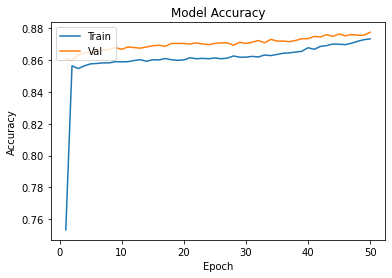

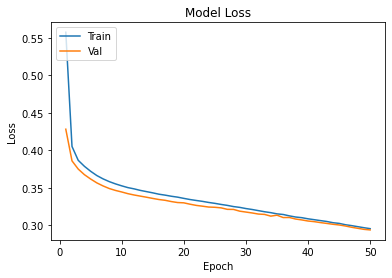

In [166]:
plot_learningCurve(history,50)

In [167]:
#evaluate testing
testeval = ann.evaluate(xtest, ytest)

85/85 [==============================] - 0s 706us/step - loss: 0.3477 - accuracy: 0.8587 - auc: 0.9069


In [168]:
#evaluate training
traineval = ann.evaluate(xvalid, yvalid)

85/85 [==============================] - 0s 706us/step - loss: 0.3256 - accuracy: 0.8694 - auc: 0.9163


In [169]:
ytest[:10]

5235     0
2723     0
4846     0
2370     0
11094    1
18082    1
12250    1
8681     0
3650     0
13421    1
Name: is_fraud, dtype: int64

In [170]:
yprediction1=opt_ann.predict(xtest)
ypred1=[]
for element in yprediction1:
    if element>0.5:
        ypred1.append(1)
    else:
        ypred1.append(0)

Text(42.0, 0.5, 'actual')

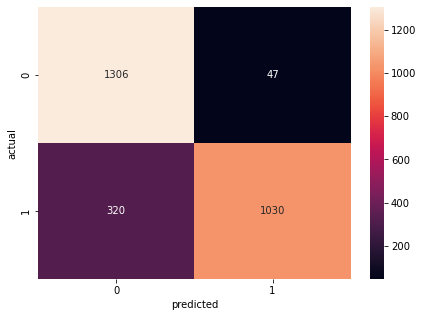

In [171]:
#plot confusion matrix
cm1 =tf.math.confusion_matrix(labels=ytest,predictions=ypred1)
plt.figure(figsize=(7,5))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [172]:
calc(opt_ann, 'ann_tuned', testeval, traineval, cm1)

Confusion Matrix Accuracy Score = 86.42%

Accuracy Score: Training -> 86.94% Testing -> 85.87%

Overfitting : 1.07%
Log Loss Training-> 0.32564273476600647 Testing -> 0.34767982363700867

Precision class 1: 95.64%
Precision class 0: 80.32%
Recall class 1: 76.30%
Recall class 0: 96.53%
F1: 84.88%
ROC AUC Training-> 91.63% Testing-> 90.69%


# CNN

In [49]:
Xtrain = Xtrain.to_numpy()
xtest = xtest.to_numpy()
xvalid = xvalid.to_numpy()

Ytrain = Ytrain.to_numpy()
ytest = ytest.to_numpy()
yvalid = yvalid.to_numpy()

In [50]:
Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)
xvalid = xvalid.reshape(xvalid.shape[0],xvalid.shape[1],1)

In [51]:
Xtrain.shape, xtest.shape, xvalid.shape

((8106, 14, 1), (2703, 14, 1), (2702, 14, 1))

In [52]:
Ytrain.shape, ytest.shape, yvalid.shape

((8106,), (2703,), (2702,))

In [53]:
#build CNN
epochs=20
cnn=Sequential()
cnn.add(Conv1D(32,2, activation='relu',input_shape=Xtrain[0].shape))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1,activation='sigmoid'))

In [54]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 13, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 12, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 12, 64)           

In [55]:
cnn.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy',
                                                                            tf.keras.metrics.AUC()])

In [56]:
history=cnn.fit(Xtrain,Ytrain,epochs=epochs,validation_data=(xvalid,yvalid),verbose=1)

Epoch 1/20
254/254 [==============================] - 2s 5ms/step - loss: 0.7898 - accuracy: 0.6548 - auc_1: 0.7110 - val_loss: 0.5884 - val_accuracy: 0.7450 - val_auc_1: 0.8474
Epoch 2/20
254/254 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.7425 - auc_1: 0.8053 - val_loss: 0.4320 - val_accuracy: 0.8390 - val_auc_1: 0.8550
Epoch 3/20
254/254 [==============================] - 1s 4ms/step - loss: 0.5787 - accuracy: 0.7686 - auc_1: 0.8274 - val_loss: 0.4220 - val_accuracy: 0.8434 - val_auc_1: 0.8581
Epoch 4/20
254/254 [==============================] - 1s 4ms/step - loss: 0.5512 - accuracy: 0.7705 - auc_1: 0.8349 - val_loss: 0.4163 - val_accuracy: 0.8442 - val_auc_1: 0.8603
Epoch 5/20
254/254 [==============================] - 1s 4ms/step - loss: 0.5180 - accuracy: 0.7867 - auc_1: 0.8457 - val_loss: 0.4094 - val_accuracy: 0.8427 - val_auc_1: 0.8618
Epoch 6/20
254/254 [==============================] - 1s 4ms/step - loss: 0.5040 - accuracy: 0.7871 - auc_1: 0

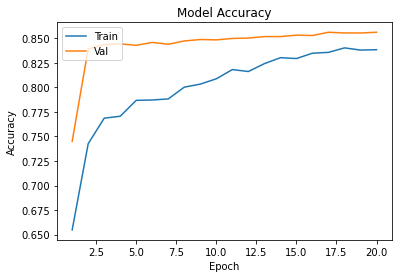

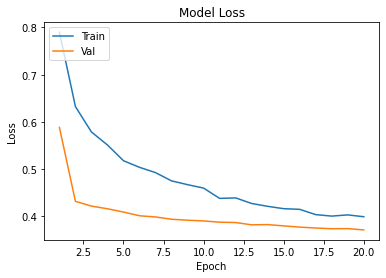

In [57]:
plot_learningCurve(history,epochs)

In [58]:
cntesteval = cnn.evaluate(xtest, ytest)
cntraineval = cnn.evaluate(Xtrain,Ytrain)

254/254 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8660 - auc_1: 0.9028


In [59]:
cnypredict=cnn.predict(xtest)
ypred2=[]
for element in cnypredict:
    if element>0.5:
        ypred2.append(1)
    else:
        ypred2.append(0)

Text(42.0, 0.5, 'actual')

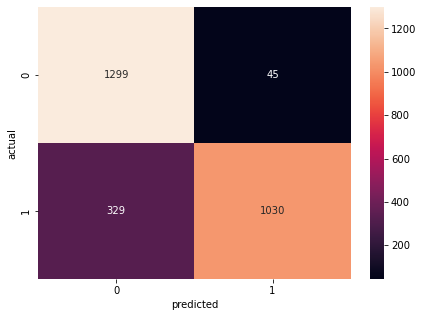

In [60]:
#plot confusion matrix
cm2 =tf.math.confusion_matrix(labels=ytest,predictions=ypred2)
plt.figure(figsize=(7,5))
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [61]:
calc(cnn, 'cnn', cntesteval, cntraineval, cm2)

Confusion Matrix Accuracy Score = 86.16%

Accuracy Score: Training -> 86.60% Testing -> 86.16%

Overfitting : 0.44%
Log Loss Training-> 0.35681265592575073 Testing -> 0.3833250403404236

Precision class 1: 95.81%
Precision class 0: 79.79%
Recall class 1: 75.79%
Recall class 0: 96.65%
F1: 84.63%
ROC AUC Training-> 90.28% Testing-> 88.48%


# Hypertuning CNN

In [62]:
#Adding MaxPool
epochs=50
cnnmax=Sequential()
cnnmax.add(Conv1D(32,2, activation='relu',input_shape=Xtrain[0].shape))
cnnmax.add(BatchNormalization())
cnnmax.add(MaxPool1D(2))
cnnmax.add(Dropout(0.2))

cnnmax.add(Conv1D(64,2, activation='relu'))
cnnmax.add(BatchNormalization())
cnnmax.add(MaxPool1D(2))
cnnmax.add(Dropout(0.5))

cnnmax.add(Flatten())
cnnmax.add(Dense(64,activation='relu'))
cnnmax.add(Dropout(0.5))

cnnmax.add(Dense(1,activation='sigmoid'))

In [63]:
cnnmax.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy',
                                                                             tf.keras.metrics.AUC()])

In [64]:
history2=cnnmax.fit(Xtrain,Ytrain,epochs=epochs,validation_data=(xvalid,yvalid),verbose=1)

Epoch 1/50
254/254 [==============================] - 2s 4ms/step - loss: 1.1699 - accuracy: 0.5358 - auc_2: 0.5481 - val_loss: 0.7662 - val_accuracy: 0.4974 - val_auc_2: 0.6671
Epoch 2/50
254/254 [==============================] - 1s 3ms/step - loss: 0.9675 - accuracy: 0.5803 - auc_2: 0.6099 - val_loss: 0.5995 - val_accuracy: 0.6880 - val_auc_2: 0.7368
Epoch 3/50
254/254 [==============================] - 1s 3ms/step - loss: 0.8757 - accuracy: 0.5971 - auc_2: 0.6410 - val_loss: 0.5791 - val_accuracy: 0.6806 - val_auc_2: 0.7512
Epoch 4/50
254/254 [==============================] - 1s 3ms/step - loss: 0.8206 - accuracy: 0.6079 - auc_2: 0.6576 - val_loss: 0.5703 - val_accuracy: 0.6873 - val_auc_2: 0.7581
Epoch 5/50
254/254 [==============================] - 1s 3ms/step - loss: 0.7824 - accuracy: 0.6208 - auc_2: 0.6658 - val_loss: 0.5618 - val_accuracy: 0.6947 - val_auc_2: 0.7656
Epoch 6/50
254/254 [==============================] - 1s 3ms/step - loss: 0.7450 - accuracy: 0.6282 - auc_2: 0

Epoch 47/50
254/254 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.7445 - auc_2: 0.7879 - val_loss: 0.5004 - val_accuracy: 0.7587 - val_auc_2: 0.8226
Epoch 48/50
254/254 [==============================] - 1s 3ms/step - loss: 0.5281 - accuracy: 0.7434 - auc_2: 0.7896 - val_loss: 0.5001 - val_accuracy: 0.7583 - val_auc_2: 0.8229
Epoch 49/50
254/254 [==============================] - 1s 3ms/step - loss: 0.5199 - accuracy: 0.7469 - auc_2: 0.7964 - val_loss: 0.4991 - val_accuracy: 0.7576 - val_auc_2: 0.8238
Epoch 50/50
254/254 [==============================] - 1s 3ms/step - loss: 0.5218 - accuracy: 0.7374 - auc_2: 0.7911 - val_loss: 0.4990 - val_accuracy: 0.7565 - val_auc_2: 0.8237


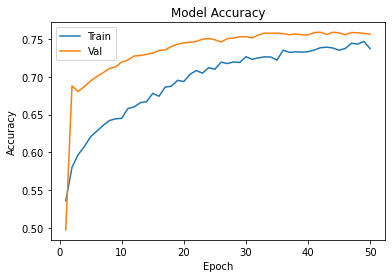

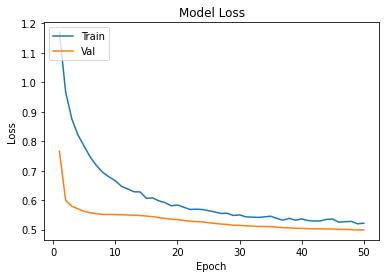

In [65]:
plot_learningCurve(history2,epochs)

In [66]:
maxtesteval = cnnmax.evaluate(xtest, ytest)
maxtraineval = cnnmax.evaluate(Xtrain,Ytrain)

254/254 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7717 - auc_2: 0.8296


In [67]:
cmpredict=cnnmax.predict(xtest)
ypred3=[]
for element in cmpredict:
    if element>0.5:
        ypred3.append(1)
    else:
        ypred3.append(0)

Text(42.0, 0.5, 'actual')

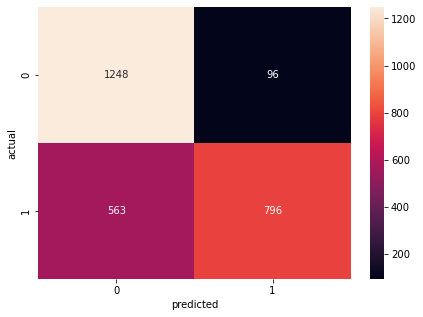

In [68]:
#plot confusion matrix
cm3 =tf.math.confusion_matrix(labels=ytest,predictions=ypred3)
plt.figure(figsize=(7,5))
sns.heatmap(cm3,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [69]:
calc(cnn, 'cnn_tuned', maxtesteval, maxtraineval, cm3)

Confusion Matrix Accuracy Score = 75.62%

Accuracy Score: Training -> 77.17% Testing -> 75.62%

Overfitting : 1.55%
Log Loss Training-> 0.4917818307876587 Testing -> 0.5147451162338257

Precision class 1: 89.24%
Precision class 0: 68.91%
Recall class 1: 58.57%
Recall class 0: 92.86%
F1: 70.72%
ROC AUC Training-> 82.96% Testing-> 80.90%


# Scoring Comparison

In [140]:
#transofrm the score list to dataframe for line chart
scoring = pd.DataFrame(score, columns = ['algo','c_matrix','acc_test','acc_train','overfit', 'loss_test',
                                         'loss_train', 'prec1', 'prec0', 'recall1','recall0',
                                         'F1', 'roctest', 'roctrain'])
scoring

,algo,c_matrix,acc_test,acc_train,overfit,loss_test,loss_train,prec1,prec0,recall1,recall0,F1,roctest,roctrain
0,SVM1,86.219997,86.219997,86.936570,0.716574,4.759453,4.511956e+00,97.252252,79.361523,74.551105,97.892919,84.401876,88.385767,91.928155
1,SVM_tuned,87.705060,87.705060,93.072311,5.367252,4.246546,2.392745e+00,93.162055,83.471328,81.388122,94.024180,86.877995,93.106077,97.608902
2,Logreg,84.631324,84.631324,85.064022,0.432697,5.308179,5.158730e+00,92.036882,79.441997,75.828729,93.436960,83.150322,84.346237,85.188760
3,logreg_tuned,85.166638,85.166638,85.537710,0.371072,5.123282,4.995118e+00,93.806452,79.371033,75.310773,95.025907,83.547213,83.810950,84.624312
4,RF,88.413055,88.413055,99.992599,11.579544,4.002003,2.556345e-03,95.952086,82.997033,80.214088,96.614853,87.380102,93.886291,100.000000
5,RF_tuned,89.051977,89.051977,100.000000,10.948023,3.781328,9.992007e-16,95.531401,84.185062,81.940608,96.165803,88.215613,94.529128,100.000000
6,RF_tuned,85.719219,85.719219,86.226038,0.506819,4.932421,4.757371e+00,95.512538,79.391700,74.965470,96.476684,84.000774,87.999325,90.529073
7,decTree,83.198066,83.198066,100.000000,16.801934,5.803250,9.992007e-16,83.075335,83.321775,83.390884,83.005181,83.232811,83.198033,100.000000
8,decTree_tuned,85.719219,85.719219,89.068167,3.348947,4.932433,3.775738e+00,92.207262,80.958084,78.038674,93.402418,84.533383,89.917038,94.469076
9,decTree_tuned,85.391124,85.391124,86.129820,0.738696,5.045744,4.790606e+00,94.759825,79.263068,74.930939,95.854922,83.686849,88.834197,90.058876


# Accuracy Score Training VS Testing

<Figure size 720x1440 with 0 Axes>

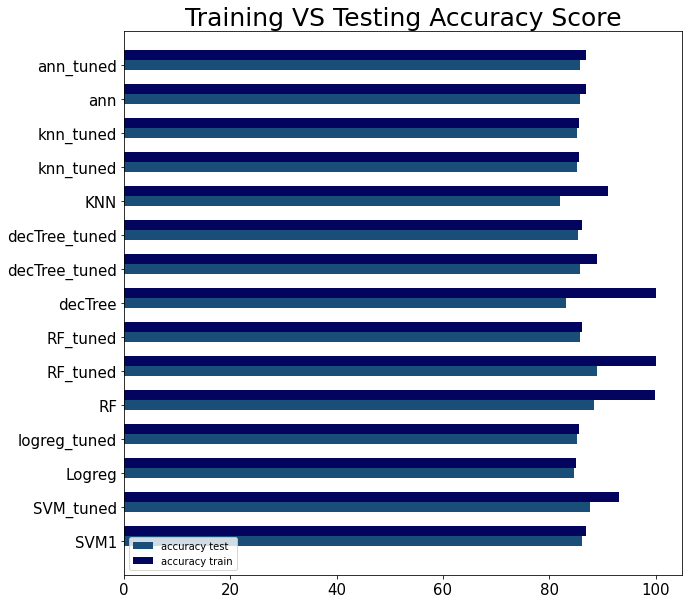

In [141]:
#horizontal bar for accuracy score comparison
plt.figure(figsize=(10,20))

ind = np.arange(len(scoring['algo']))
width = 0.3

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(ind, scoring['acc_test'], width, color='#184e77', label='accuracy test')
ax.barh(ind + width, scoring['acc_train'], width, color='#03045e', label='accuracy train')

ax.set(yticks=ind, yticklabels=scoring['algo'], ylim=[0.001*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend()
plt.title('Training VS Testing Accuracy Score', fontsize=25)
plt.show()

# Loss Training VS Testing

<Figure size 720x1440 with 0 Axes>

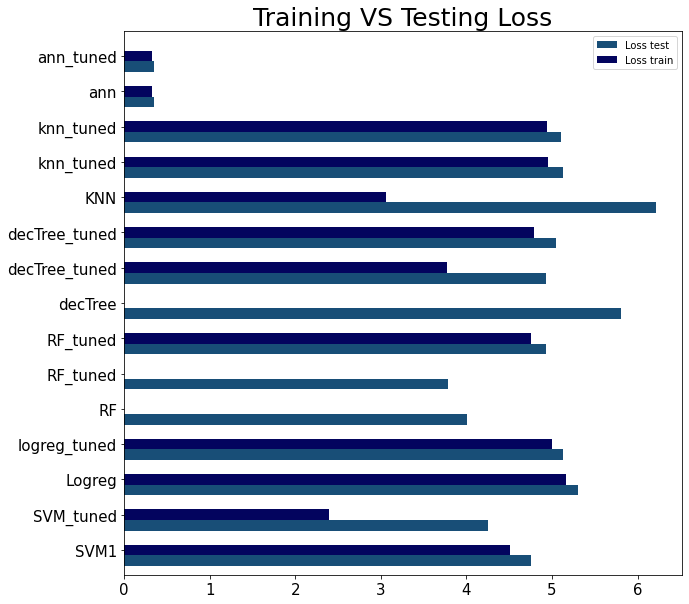

In [142]:
#horizontal bar for loss comparison
plt.figure(figsize=(10,20))

ind = np.arange(len(scoring['algo']))
width = 0.3

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(ind, scoring['loss_test'], width, color='#184e77', label='Loss test')
ax.barh(ind + width, scoring['loss_train'], width, color='#03045e', label='Loss train')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend()
plt.title('Training VS Testing Loss', fontsize=25)
plt.show()

# Precision

<Figure size 720x1440 with 0 Axes>

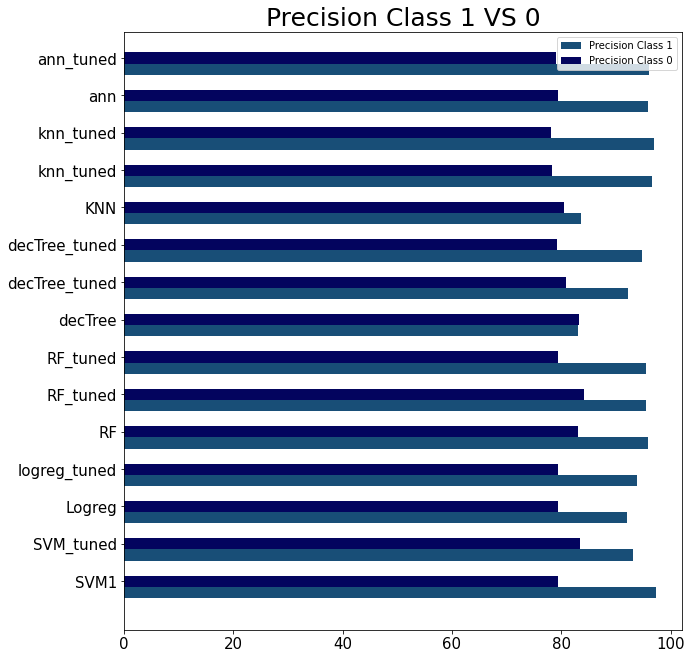

In [143]:
#horizontal bar for Precision comparison
plt.figure(figsize=(10,20))

ind = np.arange(len(scoring['algo']))
width = 0.3

fig, ax = plt.subplots(figsize=(10,11))
ax.barh(ind, scoring['prec1'], width, color='#184e77', label='Precision Class 1')
ax.barh(ind + width, scoring['prec0'], width, color='#03045e', label='Precision Class 0')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[0.001*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend()
plt.title('Precision Class 1 VS 0', fontsize=25)
plt.show()

# Recall

<Figure size 720x1800 with 0 Axes>

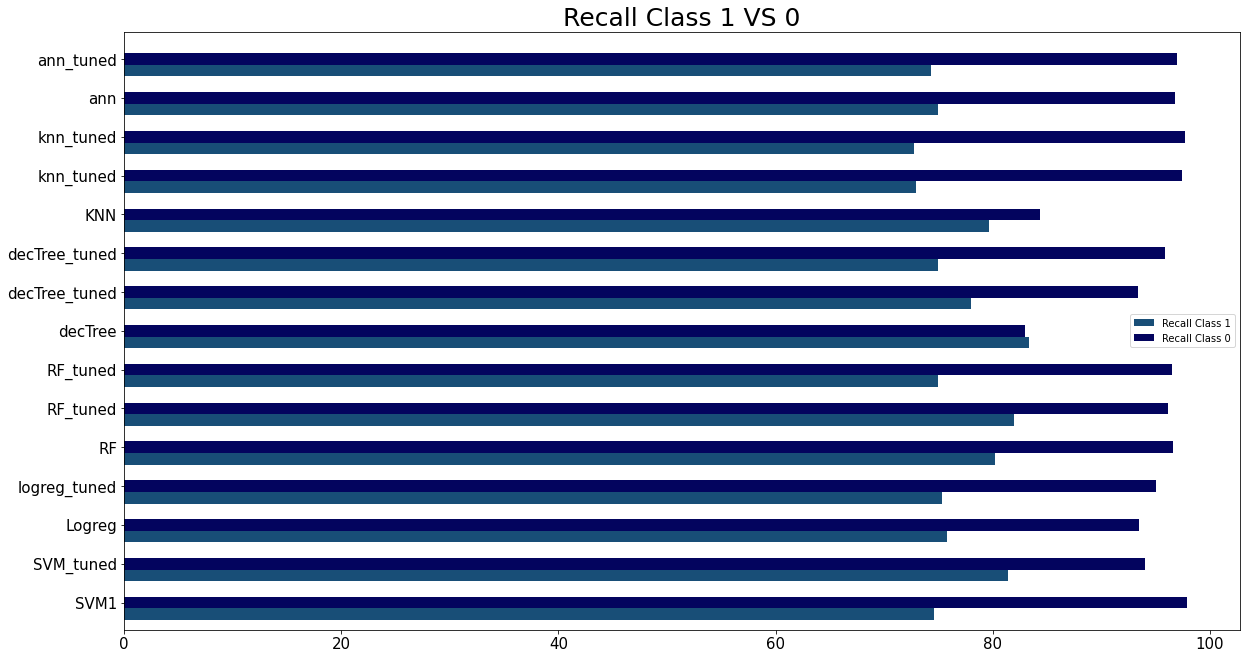

In [144]:
#horizontal bar for recall comparison
plt.figure(figsize=(10,25))

ind = np.arange(len(scoring['algo']))
width = 0.3

fig, ax = plt.subplots(figsize=(20,11))
ax.barh(ind, scoring['recall1'], width, color='#184e77', label='Recall Class 1')
ax.barh(ind + width, scoring['recall0'], width, color='#03045e', label='Recall Class 0')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend()
plt.title('Recall Class 1 VS 0', fontsize=25)
plt.show()

# ROC AUC

<Figure size 720x1440 with 0 Axes>

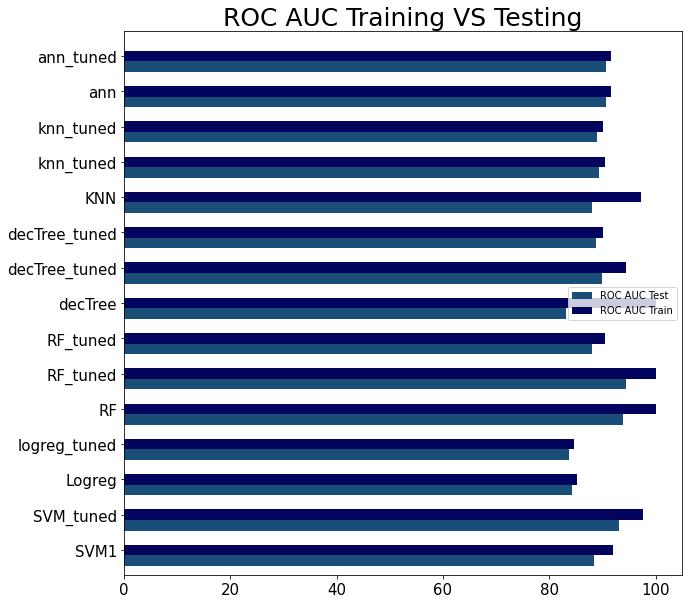

In [145]:
#horizontal bar for ROC_AUC comparison
plt.figure(figsize=(10,20))

ind = np.arange(len(scoring['algo']))
width = 0.3

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(ind, scoring['roctest'], width, color='#184e77', label='ROC AUC Test')
ax.barh(ind + width, scoring['roctrain'], width, color='#03045e', label='ROC AUC Train')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend()
plt.title('ROC AUC Training VS Testing', fontsize=25)
plt.show()

# Conclusion:

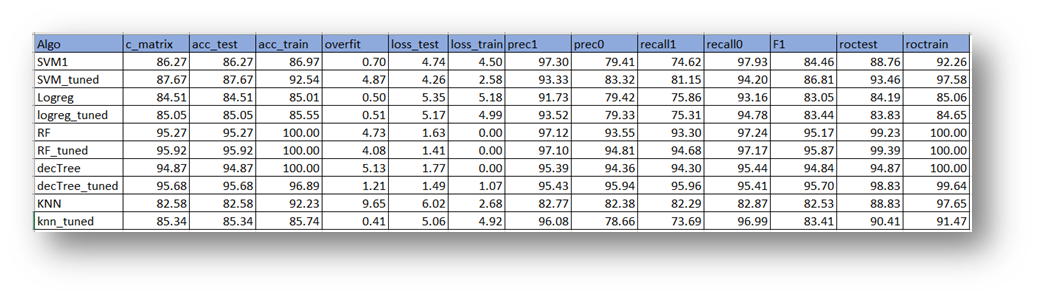

Five algorithms from Machine Learning were conducted to determine the most predictive classifier for credit card fraud detection. These projects constructed from two datasets and combine into one, with extreme imbalance classification problems that solved using Imblearn’s Random Under Sampling to make the class is balanced. Some models have a high accuracy score; however, the overfitting cannot be avoided. For example, Decision Tree and Random Forest have a high accuracy score of more than 100% yet their overfitting percentage is almost 5%. In contrast to Decision Tree and Random Forest, KNN has the lowest accuracy score which is 82.58% and the overfitting percentage is the highest with 9.65%.

Hyperparameter tuning and K-Fold cross-validation are applied to cope with the overfitting problem and to improve the accuracy. As a result, the overfit in KNN dropped from 9.65% to 0.41% by increasing the number of Neighbour and some changes in the parameters, the accuracy score is also increased around 3% to 85.34%. Similar to KNN, the overfitting percentage also reduced from 5.13% to 1.77% for the Decision Tree and the accuracy score is slightly increased.

For future benefits, we selected three algorithms with the lowest percentage of overfitting as they will generalise well to new data. If the model can generalise the data well, it also could perform the classification or prediction task that was intended for. Consequently, we picked KNN, Logistic Regression, and Decision Tress as our final algorithm for the credit card fraud detection problem.
